In [2]:
include("latticeFSchevy.jl")
using LinearAlgebra
using PyPlot

In [3]:
Nx = 63
mu = 0.5
Q = 0 
fs = FSparms(Nx,  mu)
println("N electrons = ", fs.Np)
tX = 1.0

w = [-15:0.01:19;]*fs.EF
gamma = 0.4*fs.EF
U = -5
Qs = [0:Nx-1;]
AwQ = 0 * w .* Qs'

@time for Q in Qs
    cp = ChevyParms(Q, 1.0, tX, fs)
    cp.U = U; cp.g = U/fs.Nx
    H = build_HChevy(fs, cp; ifterms=[1,1,1,1])
    E,V = eigen(H)
    AwQ[:,Q+1] .= assemble_spectrum(E, V, w, gamma)
end

N electrons = 15
 16.884963 seconds (2.83 M allocations: 6.611 GiB, 7.88% gc time, 5.54% compilation time)


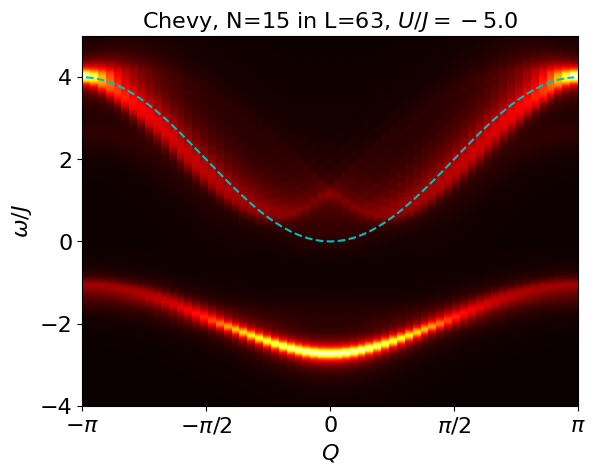

In [4]:
fntsz = 16
subplots_adjust(wspace=0.28)
q = 2pi/Nx*[0:div(Nx,2);-div(Nx,2):-1]
iqs = sortperm(q)



title("Chevy, N=15 in L=63, "*L"U/J=-5.0", fontsize=fntsz)
pcolormesh(q[iqs], w , AwQ[:,iqs], cmap="hot")
plot(q[iqs], 2*(1 .- cos.(q[iqs])), "c--")
xlim([-pi,pi])
ylim([-4,5])
xlabel(L"Q", fontsize=fntsz)
ylabel(L"\omega / J", fontsize=fntsz)
xticks([-pi,-0.5pi,0,0.5pi,pi], [L"-\pi",L"-\pi/2",L"0",L"\pi/2",L"\pi"], fontsize=fntsz);
yticks([-4:2:4;], fontsize=fntsz);